In [11]:
import pandas as pd
import pathlib as p

In [12]:
perso = pd.read_csv(p.Path("../dataset") / "personnality.csv")
perso.gender = perso.gender.astype("category")
people = perso[~perso.isOrganisation]
organisations = perso[perso.isOrganisation]

<Axes: ylabel='gender'>

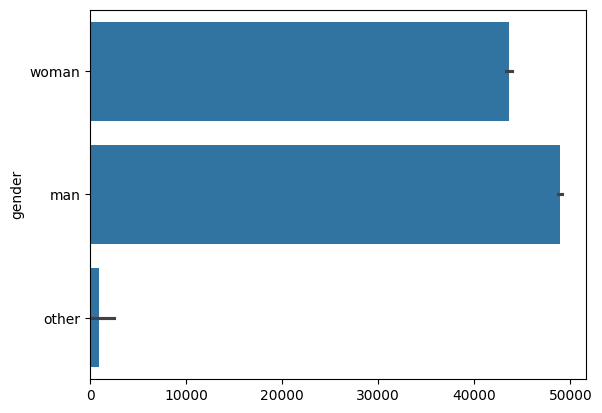

In [13]:
import seaborn as sns

sns.barplot(
    data=people.gender, order=["woman", "man", "other"])

In [14]:
grille = pd.read_csv(p.Path("../dataset") / "grid" / "franceinter" / "2022-01-01.csv", parse_dates=True)
matinale_inter = grille[(grille.concept_title == "Le 7/10") | (grille.concept_title == "Le 6/9")]
matinale_inter[["concept_title", "diffusion_title", "magnetotheque_id"]].head()

,concept_title,diffusion_title,magnetotheque_id
1,Le 6/9,"Marianne Chaillan, Jean-Marc Bador et Justine ...",2022F25156S0001
52,Le 6/9,Pascal Bruckner et Thomas Gomart,2022F25156S0002
116,Le 7/10,Olivier Véran - Jean-Luc Mélenchon,2022F10761S0003
187,Le 7/10,Karine Tuil - Gabriel Attal,2022F10761S0004
265,Le 7/10,Hélène Lambert - Emmanuel Carrère - Éric Ciotti,2022F10761S0005


In [15]:
matinale_inter[["concept_title", "diffusion_title", "magnetotheque_id"]].diffusion_title

1       Marianne Chaillan, Jean-Marc Bador et Justine ...
52                       Pascal Bruckner et Thomas Gomart
116                    Olivier Véran - Jean-Luc Mélenchon
187                           Karine Tuil - Gabriel Attal
265       Hélène Lambert - Emmanuel Carrère - Éric Ciotti
343       Ursula von der Leyen - Geoffroy Roux de Bézieux
413                                          Bruno Latour
478                       Karima Delli et Adèle B. Combes
529                    Clotilde Hesme et Augustin Landier
596     Charlotte Gainsbourg - Jane Birkin - Christoph...
670                        Patrice Evra - Gérard Larcher 
747     Delphine Ernotte - Sophie Cluzel - Claude Chirac 
827                     Valérie Lemercier - Anne Hidalgo 
898                                        Gérald Bronner
962     Mikael Corre, Eric Ruf, Georges Forestier et P...
1012                   Le 6/9 du dimanche 16 janvier 2022
1077              Sandrine Kiberlain - Pr Arnaud Fontanet
1153          

In [16]:
head_p = matinale_inter.diffusion_title.str.split(", ").str[:-1]
last_p = matinale_inter.diffusion_title.str.split(", ").str[-1]
people_matinale = (head_p + last_p.str.split(" et ")).explode()
people_matinale = people_matinale.str.split(" - ").explode()
people_matinale

1                     Marianne Chaillan
1                       Jean-Marc Bador
1                        Justine Caillé
52                      Pascal Bruckner
52                        Thomas Gomart
                     ...               
1926                     Emmanuel Faber
1926                     Florence Parly
1976                     Jeanne Cherhal
1976                    Philippe Poutou
2041    Le 7/9 du lundi 31 janvier 2022
Name: diffusion_title, Length: 69, dtype: object

In [17]:
people_matinale.isin(people).any()

False

In [20]:
people[people.name.str.startswith("Emmanu")]

,uuid,path,published_date,updated_date,name,first_name,last_name,role,isOrganisation,body,gender,url,station_id,alternateNames,relationships,connections
111,d6d5f924-4412-416e-aec8-25a41ce68f0f,NaN,2023-09-23 00:44:47,1695429887,Emmanuelle Olivier,Emmanuelle,Olivier,"chargée de recherche au CNRS, spécialiste du s...",False,NaN,none,NaN,[0],NaN,NaN,NaN
226,ae7ec06b-b7ff-4663-98e7-cfb29e7b51d9,NaN,2023-09-15 14:43:39,1694789019,Emmanuelle Pons,Emmanuelle,Pons,directrice des opérations internationales de L...,False,NaN,woman,NaN,[0],NaN,NaN,NaN
267,fd1c49cb-5afa-48b3-84b3-e545d3942f59,NaN,2023-09-14 15:17:04,1694704624,Emmanuel Charles,Emmanuel,Charles,NaN,False,NaN,man,NaN,[0],NaN,NaN,NaN
601,e03580b2-2df6-4833-9f66-6faa7ec67fe8,NaN,2023-08-14 15:35:53,1692027353,Emmanuel Auvray,Emmanuel,Auvray,Enseignant chercheur au laboratoire Histemé - ...,False,NaN,man,NaN,[0],NaN,NaN,NaN
1016,441cc8a3-21f9-43be-a18d-84feb6b11967,NaN,2023-06-26 10:47:54,1687776474,Emmanuelle Macaigne,Emmanuelle,Macaigne,Responsable du département conservation – patr...,False,NaN,woman,NaN,[0],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93569,4bac707a-e74e-49f6-a46d-687c2af29f1e,NaN,2014-07-23 14:36:30,1643126744,Emmanuel Villaume,Emmanuel,Villaume,Chef d'orchestre,False,NaN,man,NaN,[0],NaN,NaN,NaN
94275,0f99ed4f-23ab-4401-ba2c-1d0f756061c8,NaN,2014-01-27 13:01:29,1643126750,Emmanuelle Swiercz,Emmanuelle,Swiercz,Pianiste,False,NaN,woman,https://www.radiofrance.fr/,[0],NaN,NaN,NaN
95213,7fd32b28-3494-11e2-83bf-52540079b48c,personnes/emmanuelle-wiener,2012-11-22 11:05:15,1682428770,Emmanuelle Wiener,Emmanuelle,Wiener,Animatrice sur France Bleu Occitanie,False,Emmanuelle Wiener anime la matinée de France B...,woman,https://www.radiofrance.fr/personnes/emmanuell...,[0],['Emmanuelle Wiener'],NaN,NaN
95281,767308bb-3310-11e2-83bf-52540079b48c,personnes/emmanuel-claverie,2012-11-20 12:47:35,1643126741,Emmanuel Claverie,Emmanuel,Claverie,NaN,False,Journaliste à France Bleu Périgord\.,man,https://www.radiofrance.fr/personnes/emmanuel-...,[0],['Emmanuel Claverie'],NaN,NaN


Index(['andy', 'female', 'male', 'mostly_male', 'unknown'], dtype='object')


<Axes: ylabel='diffusion_title'>

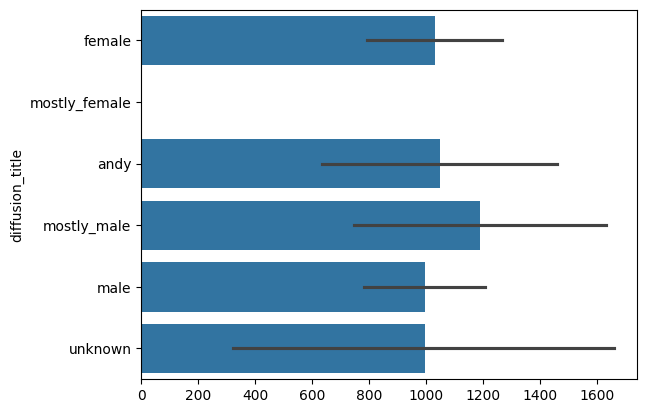

In [21]:
import gender_guesser.detector as gender
d = gender.Detector()
gender_guests = (
    people_matinale
        .str.split(" ")
        .str[0]
        .map(lambda firstname: d.get_gender(firstname, "france")).astype("category")
)

print(gender_guests.cat.categories)

sns.barplot(
    data=gender_guests, order=["female", "mostly_female", "andy", "mostly_male", "male", "unknown"])